### Prerequisites

In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
from tqdm import tqdm
from pathlib import Path
from dotenv import load_dotenv
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

load_dotenv()

True

### Data Loading

In [2]:
data_dir = Path(os.environ['dataset_dir'])
df = pd.read_csv(data_dir / 'train.csv')
df = df.set_index('row_id')

# EDA inside alone investment ID

### Correlation between features and target

In [3]:
inv_id = 3331 # has 1206 rows, its the 20th popular investment id
# inv_id = 781 # has 1119 rows, its the 1003th popular investment id

In [4]:
sample = df[df.investment_id == inv_id]

In [5]:
sample.iloc[:, 3:].corrwith(sample.target).sort_values()

f_228   -0.106122
f_283   -0.101718
f_4     -0.101076
f_262   -0.097764
f_186   -0.096767
           ...   
f_193    0.108260
f_172    0.108832
f_202    0.120402
f_188    0.132515
f_22     0.150117
Length: 300, dtype: float64

Text(0.5, 1.0, 'Days correlation')

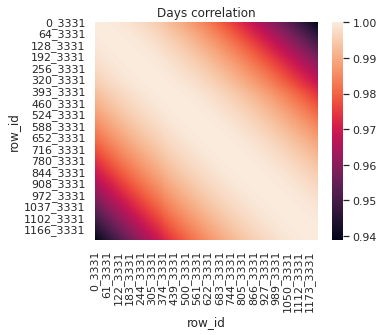

In [6]:
sns.set(rc={"figure.figsize":(5, 4)}) 
sns.heatmap(sample.T.corr())
plt.title("Days correlation")

### Row correlations in different investments

In [7]:
invs_ids = df.sample(10).investment_id.unique()
len(invs_ids)

10

100%|██████████| 10/10 [00:34<00:00,  3.42s/it]


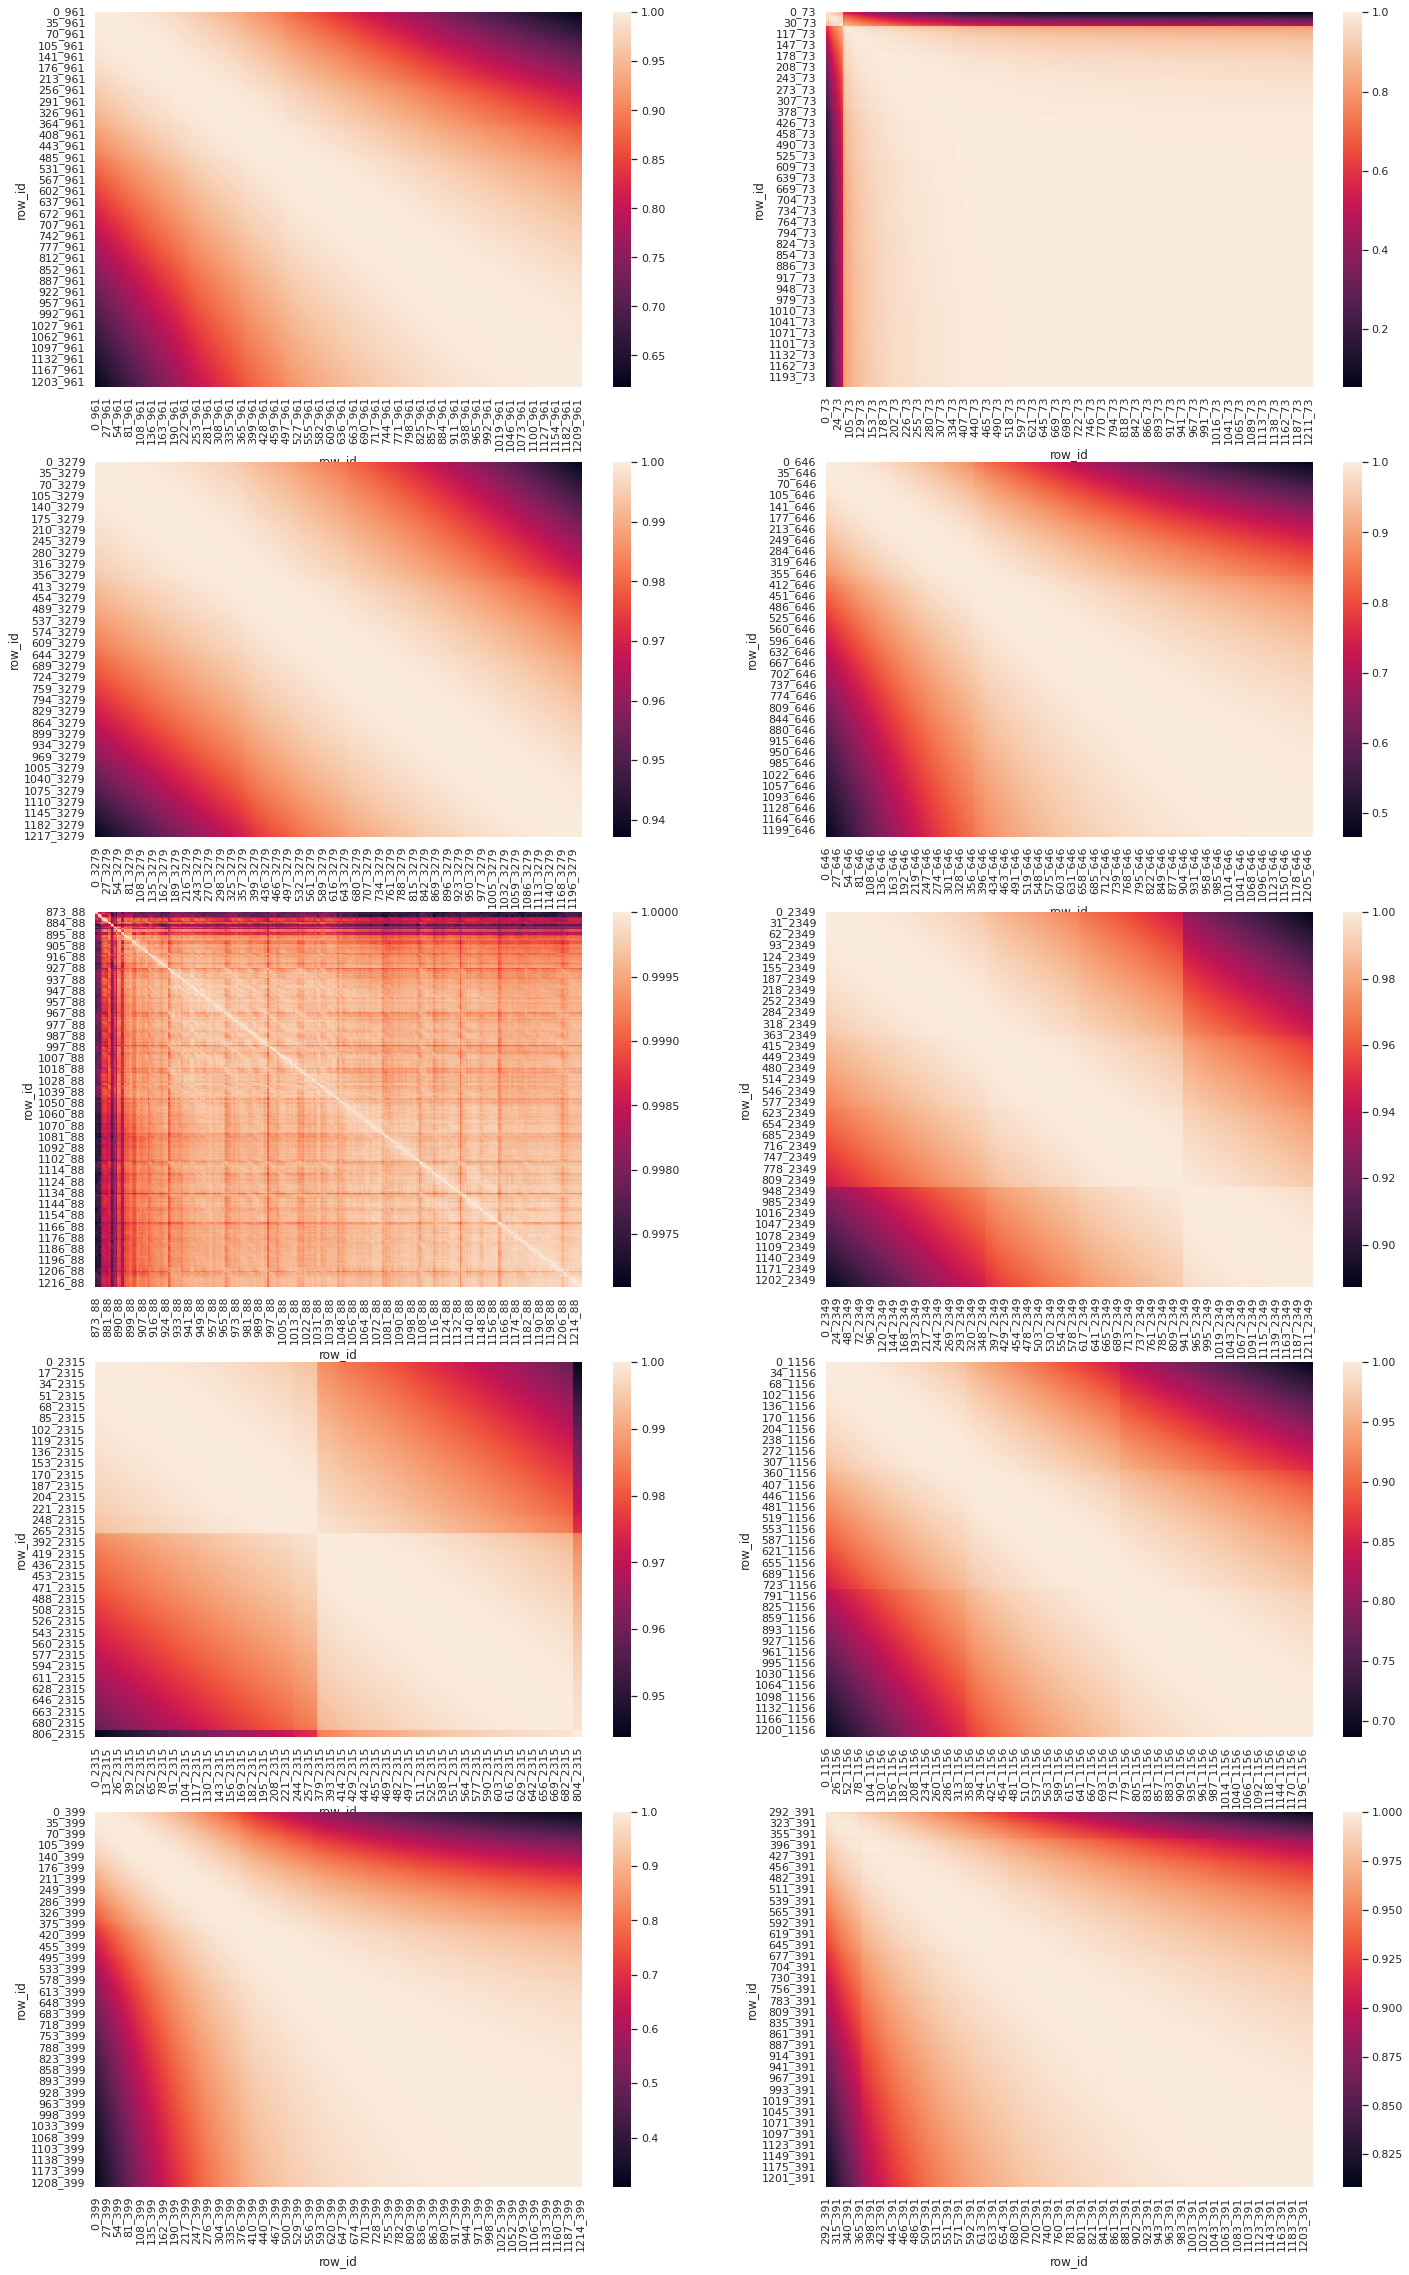

In [8]:
sns.set(rc={"figure.figsize":(24, 40)}) 
fig, ax = plt.subplots(5, 2)
for i in tqdm(range(10)):
    sample = df[df.investment_id == invs_ids[i]]
    sns.heatmap(sample.T.corr(), ax=ax[i//2][i%2])

### How do features change with time

In [9]:
# inv_id = 3331 # has 1206 rows, its the 20th popular investment id
inv_id = 781 # has 1119 rows, its the 1003th popular investment id
sample = df[df.investment_id == inv_id]

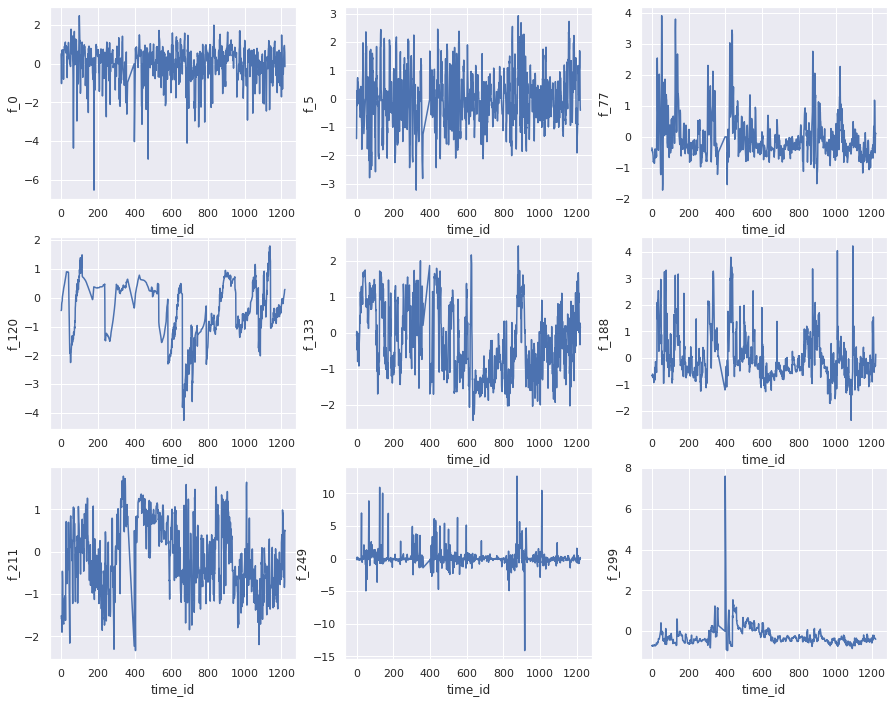

In [10]:
sns.set(rc={"figure.figsize":(15, 12)})
features = [f'f_{i}' for i in [0, 5, 77, 120, 133, 188, 211, 249, 299]]
fig, ax = plt.subplots(3, 3)
for i in range(9):
    sns.lineplot(x='time_id', y=features[i], data=sample, ax=ax[i//3][i%3])

### In similar rows, are the targets similar? In this single simple experiment, not really 

In [11]:
inv_id = 781 # has 1119 rows, its the 1003th popular investment id
sample = df[df.investment_id == inv_id]

In [12]:
sample_features = sample.iloc[:, 3:]
sample_features
row_idx = 12
row = sample_features.iloc[row_idx]
sample_features = sample_features[100:]  # drop first 100 as they are correlated to high
row

f_0      0.185761
f_1      0.046644
f_2      0.938827
f_3     -0.529574
f_4     -0.503743
           ...   
f_295   -0.618710
f_296    1.451846
f_297   -0.525668
f_298    0.834375
f_299   -0.681429
Name: 12_781, Length: 300, dtype: float64

In [13]:
sample_distance_to_row = ((sample_features - row) ** 2).mean(axis=1)

Here is the closest guy: ROI in time id 1142

[Text(0.5, 1.0, 'Euclidean distance to the chosen row histogram')]

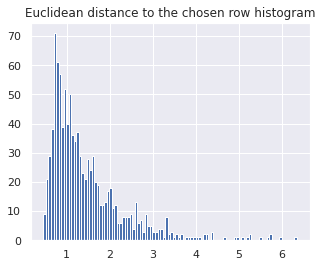

In [14]:
sns.set(rc={"figure.figsize":(5, 4)})
sample_distance_to_row.hist(bins=100).set(title='Euclidean distance to the chosen row histogram')

In [15]:
idx_closest = sample_distance_to_row.idxmin()
idx_closest

'1142_781'

In [16]:
print(f"Targets are {sample.loc[idx_closest, 'target']} and {sample.iloc[row_idx, 2]}")

Targets are 0.39643157 and -0.0593725


/miniconda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='1142_781', ylabel='12_781'>

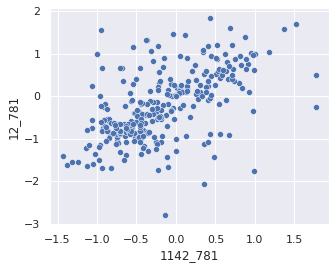

In [17]:
sns.scatterplot(sample.loc[idx_closest, 'f_0':], sample.iloc[row_idx, 3:])